In [2]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
from Image_segmentation import load_processed_images
from skimage import io


In [3]:
exps = {
    'control': ('control_','control_4'),
    '0': ('001','052'),
    '1': ('056','067'),
    '2': ('068','078'),
    '3': ('079','088'),
    '4': ('089', '097'),
    '5': ('098', '122'),
    'control2': ('123','123')
}

In [4]:
df = pd.read_csv("../datasets/quality_scores.csv", dtype={'Experiment': str})
#df['Experiment'] = df['Experiment'].apply(lambda x: 'c'+x if len(x)==1 else x)
df['Experiment'] = df['Experiment'].apply(lambda x: 'control_'+x if len(x)==1 else x)


In [5]:
dfc = pd.concat([df[(exps['control'][0] <= df['Experiment']) & (df['Experiment'] <= exps['control'][1])]])
df0 = pd.concat([df[(exps['0'][0] <= df['Experiment']) & (df['Experiment'] <= exps['0'][1])]])
df1 = pd.concat([df[(exps['1'][0] <= df['Experiment']) & (df['Experiment'] <= exps['1'][1])]])
df2 = pd.concat([df[(exps['2'][0] <= df['Experiment']) & (df['Experiment'] <= exps['2'][1])]])
df3 = pd.concat([df[(exps['3'][0] <= df['Experiment']) & (df['Experiment'] <= exps['3'][1])]])
df4 = pd.concat([df[(exps['4'][0] <= df['Experiment']) & (df['Experiment'] <= exps['4'][1])]])
df5 = pd.concat([df[(exps['5'][0] <= df['Experiment']) & (df['Experiment'] <= exps['5'][1])]])
dfx = pd.concat([df[(exps['control2'][0] <= df['Experiment']) & (df['Experiment'] <= exps['control2'][1])]])

In [20]:
df3

,Experiment,Index,Param1,Param2,Param3,Param4,Area sum,BLOBs,Area mean,Area std,Roundness mean,Roundness std,Perimeter mean,Perimeter std
741,079,0,2.00,52,2.00,245,2978,86,327.372093,754.173551,0.686662,0.275725,73.383365,110.410748
742,079,1,2.00,52,2.00,245,2364,89,188.539326,227.994286,0.710007,0.266523,57.482937,49.930284
743,079,2,2.00,52,2.00,245,2317,83,221.120482,359.630078,0.705104,0.249606,62.887294,73.416243
744,079,3,2.00,52,2.00,245,2441,69,275.405797,776.079245,0.700463,0.271718,69.801201,117.971051
745,079,4,2.00,52,2.00,245,2987,73,385.410959,969.407570,0.701891,0.281066,77.020788,117.024644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,088,5,1.25,68,2.25,187,2356,74,232.040541,378.702102,0.749152,0.237207,66.187812,73.385233
836,088,6,1.25,68,2.25,187,2525,89,224.314607,359.717448,0.704914,0.286337,61.895029,68.096210
837,088,7,1.25,68,2.25,187,2257,76,211.236842,256.452872,0.708544,0.264140,61.185114,56.000588
838,088,8,1.25,68,2.25,187,2651,92,284.663043,518.823633,0.756950,0.212239,70.956708,89.208999


In [17]:
df0[ (df0['Experiment']=='046') & (df0['Index']==9)]

,Experiment,Index,Param1,Param2,Param3,Param4,Area sum,BLOBs,Area mean,Area std,Roundness mean,Roundness std,Perimeter mean,Perimeter std
455,046,9,1.1,60,2.0,190,1497,30,185.066667,243.046488,0.719882,0.191343,53.407148,43.808732


In [11]:
df0[ (df0['Area sum']<1800)].sort_values(by=['Area sum'], ascending=True).iloc[20:].head(20)

,Experiment,Index,Param1,Param2,Param3,Param4,Area sum,BLOBs,Area mean,Area std,Roundness mean,Roundness std,Perimeter mean,Perimeter std
211,022,3,1.1,66,2.0,220,1481,26,234.269231,282.076580,0.758970,0.198439,65.562875,57.213276
173,018,4,1.1,56,2.0,220,1483,35,190.371429,226.367979,0.699313,0.263551,55.602966,41.687870
172,018,3,1.1,56,2.0,220,1491,27,174.074074,233.656114,0.710618,0.265380,52.571355,42.963200
455,046,9,1.1,60,2.0,190,1497,30,185.066667,243.046488,0.719882,0.191343,53.407148,43.808732
75,008,6,1.3,60,2.0,220,1512,23,155.304348,169.551950,0.627185,0.365303,51.657036,40.509808
174,018,5,1.1,56,2.0,220,1513,19,226.368421,260.108927,0.746106,0.252765,62.099607,48.075281
477,049,1,1.1,60,2.0,230,1514,20,255.900000,307.276732,0.727992,0.258793,68.390821,58.288878
463,047,7,1.1,60,2.0,200,1526,31,233.548387,279.630267,0.679070,0.314548,64.307393,57.755297
214,022,6,1.1,66,2.0,220,1530,28,176.642857,259.520466,0.749778,0.212212,50.706895,39.553996
357,037,0,1.1,60,2.2,220,1538,27,153.148148,187.369847,0.713025,0.266477,48.860168,36.971557


In [26]:
# dataframe with unique experiments
temp_df = pd.concat([df1,df2,df3])
temp_df.drop_duplicates(subset=['Experiment'], keep='first')


,Experiment,Index,Param1,Param2,Param3,Param4,Area sum,BLOBs,Area mean,Area std,Roundness mean,Roundness std,Perimeter mean,Perimeter std
515,056,0,2.00,58,2.00,222,2260,63,171.920635,214.817183,0.682178,0.306600,52.446192,38.745096
525,057,0,1.25,56,2.25,287,2329,55,239.618182,370.097259,0.672615,0.314334,63.020516,66.488446
534,058,0,1.50,64,2.25,165,2239,60,206.900000,287.952930,0.694151,0.281397,59.507386,53.751652
544,059,0,1.25,70,1.50,297,2251,60,217.716667,253.087409,0.774051,0.210595,60.655896,45.308090
554,060,0,1.50,50,1.50,197,2181,53,220.000000,289.733515,0.713028,0.267295,61.403667,56.629643
564,061,0,1.00,38,2.50,152,2321,67,227.507463,326.067724,0.712474,0.250230,64.179053,63.022421
574,062,0,1.50,74,2.00,227,2208,53,225.490566,415.295013,0.733215,0.246991,63.981198,80.962665
584,063,0,1.25,46,2.00,215,2170,55,252.909091,419.268466,0.641628,0.322718,61.875062,66.667645
594,064,0,1.00,36,1.50,295,2215,67,210.134328,279.537512,0.687839,0.317366,60.795220,52.611752
604,065,0,1.25,60,2.00,217,2616,59,404.084746,1021.639216,0.687007,0.292985,83.359230,135.224959


In [39]:
all_df = pd.concat([dfc, df0, df1, df2, df3, df4, df5])

all_df[ (all_df['Param1']==1) & (all_df['Param2']==60) & (all_df['Param3']==2) & (all_df['Param4']==220)]

,Experiment,Index,Param1,Param2,Param3,Param4,Area sum,BLOBs,Area mean,Area std,Roundness mean,Roundness std,Perimeter mean,Perimeter std
39,005,0,1.0,60,2.0,220,2736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,005,1,1.0,60,2.0,220,1885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,005,2,1.0,60,2.0,220,1669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,005,3,1.0,60,2.0,220,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,005,4,1.0,60,2.0,220,1899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,005,5,1.0,60,2.0,220,2167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,005,6,1.0,60,2.0,220,2513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,005,7,1.0,60,2.0,220,3278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,005,8,1.0,60,2.0,220,3799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,005,9,1.0,60,2.0,220,2089,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
print("Mean",dfc['Area sum'].mean())
print("Std",dfc['Area sum'].std())
print("Max",dfc['Area sum'].max())
print("Min",dfc['Area sum'].min())
print()

df65 = df1[df1['Experiment']=='065']
print("Mean",df65['Area sum'].mean())
print("Std",df65['Area sum'].std())
print("Max",df65['Area sum'].max())
print("Min",df65['Area sum'].min())
print()

df21 = df0[df0['Experiment']=='021']
print("Mean",df21['Area sum'].mean())
print("Std",df21['Area sum'].std())
print("Max",df21['Area sum'].max())
print("Min",df21['Area sum'].min())

Mean 1450.825
Std 400.2562568578363
Max 2833
Min 902

Mean 2159.6
Std 235.20591451369208
Max 2616
Min 1886

Mean 1955.0
Std 401.5638872652215
Max 2532
Min 1272


# Plot mean/std of different ranges of impurities

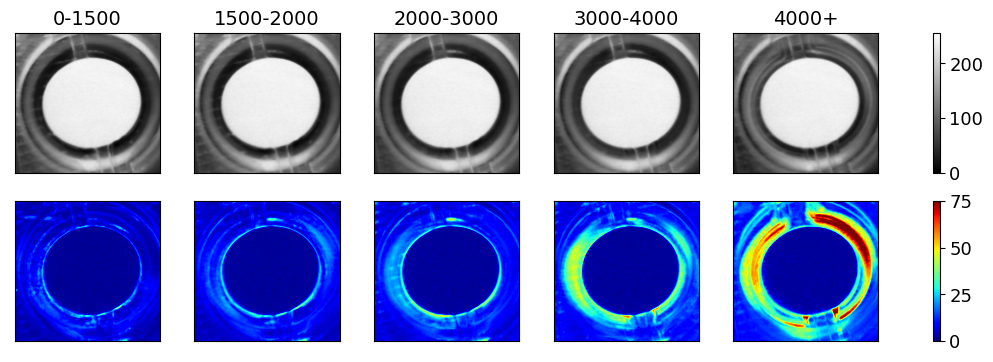

In [11]:
import re 

fig, axs = plt.subplots(2, 5, figsize=(14,4))
bound = [(0,1500),(1500,2000),(2000,3000),(3000,4000),(4000,15000)]

imgs, file_names = load_processed_images()

def extract_params(string):
    regex=r'\d*\.?\d+'
    matches = re.findall(regex, string)
    return matches

#print(extract_params('001,0,[0.25, 60, 2, 220].bmp'))


for i in range(5):
    temp_imgs = []
    temp_df = df[ (df['Area sum'] > bound[i][0]) & (df['Area sum'] < bound[i][1]) ]
    
    for j, file in enumerate(file_names):
        params = extract_params(file)
        if len(params[0]) == 1:
            params[0] = 'c'+params[0]
        
        for index, row in temp_df.iterrows():

            if row['Experiment'] == params[0] and str(row['Index']) == params[1]:
                temp_imgs.append(imgs[j])
                break
        
    
    
    axs[0,i].set_title(f'{bound[i][0]}-{bound[i][1]}', fontsize=14)
    im1 = axs[0,i].imshow(np.array(temp_imgs).mean(axis=0), cmap='gray', vmin=0, vmax=255)
    im2 = axs[1,i].imshow(np.array(temp_imgs).std(axis=0), cmap='jet', vmin=0, vmax=75)

for i in range(5):
    axs[0,i].set_xticks([])
    axs[0,i].set_yticks([])
    axs[1,i].set_xticks([])
    axs[1,i].set_yticks([])

cbar1 = fig.colorbar(im1, ax=axs.ravel()[:5].tolist())
cbar2 = fig.colorbar(im2, ax=axs.ravel()[5:].tolist())
cbar1.ax.tick_params(labelsize=13)
cbar2.ax.tick_params(labelsize=13)  

axs[0,4].set_title("4000+", fontsize=14)
plt.show()

In [ ]:
im = axs[i//3][i%3].imshow(std_imgs[i], cmap='jet')
axs[i//3][i%3].set_title("Exp "+str(i))
fig.colorbar(im, ax=axs[i//3][i%3])
im.set_clim(vmin=0, vmax=50)

# Plot mean/std of different ranges of parameters

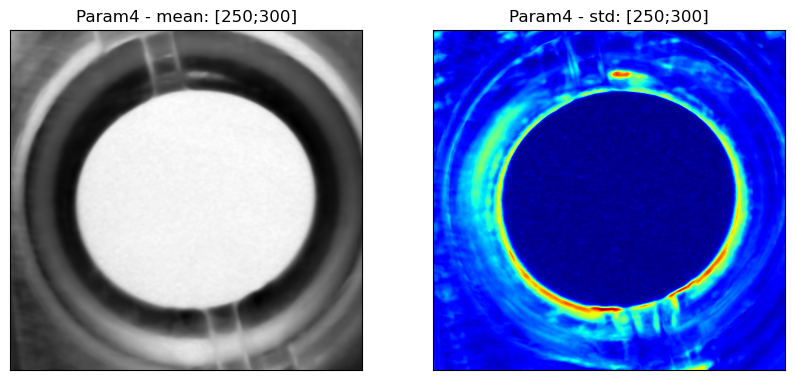

In [25]:
import re 

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

imgs, file_names = load_processed_images()

def extract_params(string):
    regex=r'\d*\.?\d+'
    matches = re.findall(regex, string)
    return matches

#print(extract_params('001,0,[0.25, 60, 2, 220].bmp'))


bound = [250,300]
param = 'Param4'

temp_imgs = []
temp_df = df[ (df[param] >= bound[0]) & (df[param] < bound[1]) ]

for j, file in enumerate(file_names):
    params = extract_params(file)
    if len(params[0]) == 1:
        params[0] = 'c'+params[0]
    
    for index, row in temp_df.iterrows():

        if row['Experiment'] == params[0] and str(row['Index']) == params[1]:
            temp_imgs.append(imgs[j])
            break
    
method = ["mean", "std"]
for i in range(2):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f'{param} - {method[i]}: [{bound[0]};{bound[1]}]')

axs[0].imshow(np.array(temp_imgs).mean(axis=0), cmap='gray')
axs[1].imshow(np.array(temp_imgs).std(axis=0), cmap='jet')


plt.show()

# Plot training and 'test' data

In [51]:
df_train = pd.concat([dfc, df0, df5, dfx])
df_sample = pd.concat([df1,df2,df3])

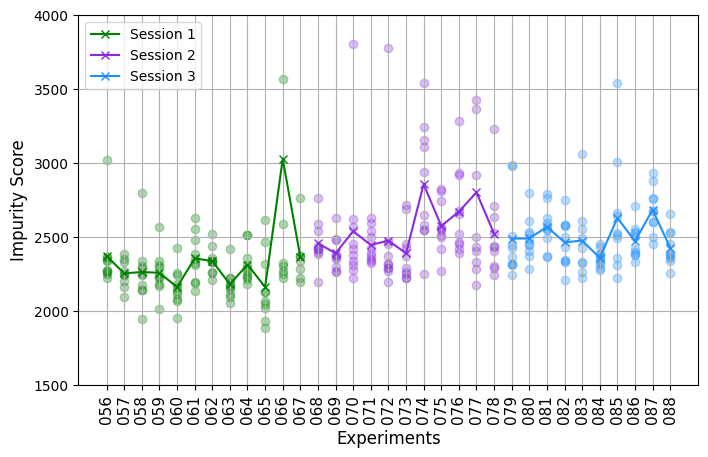

In [96]:
plt.figure().set_figwidth(8)

grouped = df1.sort_values(by=['Area sum']).groupby('Experiment').agg({'Area sum': 'mean'})
plt.plot(np.sort(df1['Experiment'].unique()), grouped.values, marker='x', c='g', label='Session 1')
plt.scatter(df1['Experiment'], df1['Area sum'], c='g',alpha=0.3)

grouped = df2.sort_values(by=['Area sum']).groupby('Experiment').agg({'Area sum': 'mean'})
plt.plot(np.sort(df2['Experiment'].unique()), grouped.values, marker='x', c='blueviolet', label='Session 2')
plt.scatter(df2['Experiment'], df2['Area sum'], c='blueviolet',alpha=0.3)

grouped = df3.sort_values(by=['Area sum']).groupby('Experiment').agg({'Area sum': 'mean'})
plt.plot(np.sort(df3['Experiment'].unique()), grouped.values, marker='x', c='dodgerblue', label='Session 3')
plt.scatter(df3['Experiment'], df3['Area sum'], c='dodgerblue',alpha=0.3)

plt.ylim(1500, 4000)
plt.xticks(rotation=90, size=11)
plt.legend()
plt.grid()
plt.ylabel('Impurity Score', size=12)
plt.xlabel('Experiments', size=12)
plt.show()

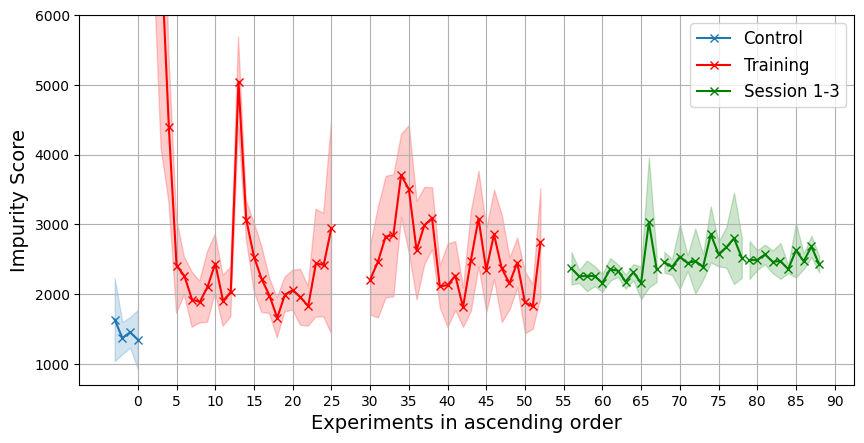

In [90]:
plt.figure().set_figwidth(10)

plt.plot(np.arange(-3,1), dfc.groupby(['Experiment'])['Area sum'].mean(), marker='x', color='C0', label='Control')
plt.plot(np.arange(1,26), df0.groupby(['Experiment'])['Area sum'].mean().take(np.arange(0,25)), marker='x', color='r', label='Training')
plt.plot(np.arange(30,53), df0.groupby(['Experiment'])['Area sum'].mean().take(np.arange(25,48)), marker='x', color='r')
plt.plot(np.arange(56,68), df1.groupby(['Experiment'])['Area sum'].mean(), marker='x', color='green', label='Session 1-3')
plt.plot(np.arange(68,79), df2.groupby(['Experiment'])['Area sum'].mean(), marker='x', color='green')
plt.plot(np.arange(79,89), df3.groupby(['Experiment'])['Area sum'].mean(), marker='x', color='green')

#plt.plot(124, dfx['Area sum'].mean(), marker='s', color='red')


plt.fill_between(np.arange(-3,1),
                    dfc.groupby(['Experiment'])['Area sum'].mean() - dfc.groupby(['Experiment'])['Area sum'].std(),
                    dfc.groupby(['Experiment'])['Area sum'].mean() + dfc.groupby(['Experiment'])['Area sum'].std(),
                    alpha=0.2, color='C0')
plt.fill_between(np.arange(1,26),
                    df0.groupby(['Experiment'])['Area sum'].mean().take(np.arange(0,25)) - df0.groupby(['Experiment'])['Area sum'].std().take(np.arange(0,25)),
                    df0.groupby(['Experiment'])['Area sum'].mean().take(np.arange(0,25)) + df0.groupby(['Experiment'])['Area sum'].std().take(np.arange(0,25)),
                    alpha=0.2, color='r')
plt.fill_between(np.arange(30,53),
                    df0.groupby(['Experiment'])['Area sum'].mean().take(np.arange(25,48)) - df0.groupby(['Experiment'])['Area sum'].std().take(np.arange(25,48)),
                    df0.groupby(['Experiment'])['Area sum'].mean().take(np.arange(25,48)) + df0.groupby(['Experiment'])['Area sum'].std().take(np.arange(25,48)),
                    alpha=0.2, color='r')

plt.fill_between(np.arange(56,68),
                    df1.groupby(['Experiment'])['Area sum'].mean() - df1.groupby(['Experiment'])['Area sum'].std(),
                    df1.groupby(['Experiment'])['Area sum'].mean() + df1.groupby(['Experiment'])['Area sum'].std(),
                    alpha=0.2, color='green')
plt.fill_between(np.arange(68,79),
                    df2.groupby(['Experiment'])['Area sum'].mean() - df2.groupby(['Experiment'])['Area sum'].std(),
                    df2.groupby(['Experiment'])['Area sum'].mean() + df2.groupby(['Experiment'])['Area sum'].std(),
                    alpha=0.2, color='green')
plt.fill_between(np.arange(79,89),
                    df3.groupby(['Experiment'])['Area sum'].mean() - df3.groupby(['Experiment'])['Area sum'].std(),
                    df3.groupby(['Experiment'])['Area sum'].mean() + df3.groupby(['Experiment'])['Area sum'].std(),
                    alpha=0.2, color='green')


plt.legend(fontsize=12)
plt.xticks(np.arange(0,91,5))
plt.xlabel("Experiments in ascending order",fontsize=14)
plt.ylabel("Impurity Score",fontsize=14)
plt.ylim(700,6000)
plt.grid()
plt.show()

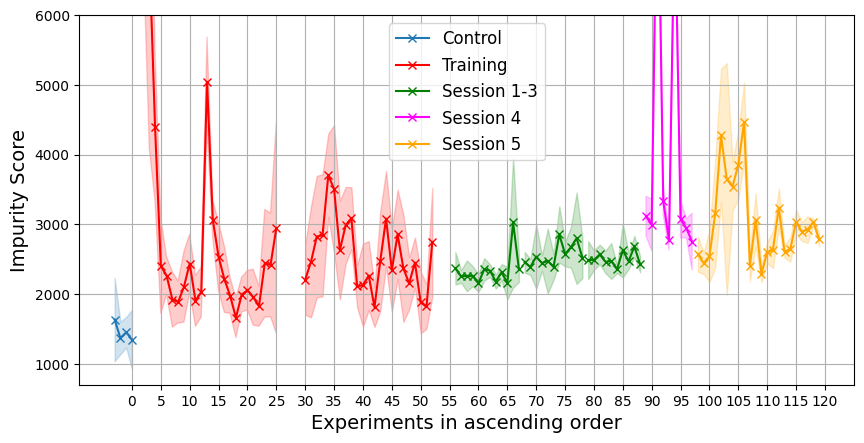

In [91]:
plt.figure().set_figwidth(10)

plt.plot(np.arange(-3,1), dfc.groupby(['Experiment'])['Area sum'].mean(), marker='x', color='C0', label='Control')
plt.plot(np.arange(1,26), df0.groupby(['Experiment'])['Area sum'].mean().take(np.arange(0,25)), marker='x', color='r', label='Training')
plt.plot(np.arange(30,53), df0.groupby(['Experiment'])['Area sum'].mean().take(np.arange(25,48)), marker='x', color='r')
plt.plot(np.arange(56,68), df1.groupby(['Experiment'])['Area sum'].mean(), marker='x', color='green', label='Session 1-3')
plt.plot(np.arange(68,79), df2.groupby(['Experiment'])['Area sum'].mean(), marker='x', color='green')
plt.plot(np.arange(79,89), df3.groupby(['Experiment'])['Area sum'].mean(), marker='x', color='green')
plt.plot(np.arange(89,98), df4.groupby(['Experiment'])['Area sum'].mean(), marker='x', color='magenta', label='Session 4')
plt.plot(np.arange(98,120), df5.groupby(['Experiment'])['Area sum'].mean(), marker='x', color='orange', label='Session 5')

#plt.plot(124, dfx['Area sum'].mean(), marker='s', color='red')


plt.fill_between(np.arange(-3,1),
                    dfc.groupby(['Experiment'])['Area sum'].mean() - dfc.groupby(['Experiment'])['Area sum'].std(),
                    dfc.groupby(['Experiment'])['Area sum'].mean() + dfc.groupby(['Experiment'])['Area sum'].std(),
                    alpha=0.2, color='C0')
plt.fill_between(np.arange(1,26),
                    df0.groupby(['Experiment'])['Area sum'].mean().take(np.arange(0,25)) - df0.groupby(['Experiment'])['Area sum'].std().take(np.arange(0,25)),
                    df0.groupby(['Experiment'])['Area sum'].mean().take(np.arange(0,25)) + df0.groupby(['Experiment'])['Area sum'].std().take(np.arange(0,25)),
                    alpha=0.2, color='r')
plt.fill_between(np.arange(30,53),
                    df0.groupby(['Experiment'])['Area sum'].mean().take(np.arange(25,48)) - df0.groupby(['Experiment'])['Area sum'].std().take(np.arange(25,48)),
                    df0.groupby(['Experiment'])['Area sum'].mean().take(np.arange(25,48)) + df0.groupby(['Experiment'])['Area sum'].std().take(np.arange(25,48)),
                    alpha=0.2, color='r')

plt.fill_between(np.arange(56,68),
                    df1.groupby(['Experiment'])['Area sum'].mean() - df1.groupby(['Experiment'])['Area sum'].std(),
                    df1.groupby(['Experiment'])['Area sum'].mean() + df1.groupby(['Experiment'])['Area sum'].std(),
                    alpha=0.2, color='green')
plt.fill_between(np.arange(68,79),
                    df2.groupby(['Experiment'])['Area sum'].mean() - df2.groupby(['Experiment'])['Area sum'].std(),
                    df2.groupby(['Experiment'])['Area sum'].mean() + df2.groupby(['Experiment'])['Area sum'].std(),
                    alpha=0.2, color='green')
plt.fill_between(np.arange(79,89),
                    df3.groupby(['Experiment'])['Area sum'].mean() - df3.groupby(['Experiment'])['Area sum'].std(),
                    df3.groupby(['Experiment'])['Area sum'].mean() + df3.groupby(['Experiment'])['Area sum'].std(),
                    alpha=0.2, color='green')
plt.fill_between(np.arange(89,98),
                    df4.groupby(['Experiment'])['Area sum'].mean() - df4.groupby(['Experiment'])['Area sum'].std(),
                    df4.groupby(['Experiment'])['Area sum'].mean() + df4.groupby(['Experiment'])['Area sum'].std(),
                    alpha=0.2, color='magenta')
plt.fill_between(np.arange(98,120),
                    df5.groupby(['Experiment'])['Area sum'].mean() - df5.groupby(['Experiment'])['Area sum'].std(),
                    df5.groupby(['Experiment'])['Area sum'].mean() + df5.groupby(['Experiment'])['Area sum'].std(),
                    alpha=0.2, color='orange')

#plt.fill_between(124,
#                    dfx.groupby(['Experiment'])['Area sum'].mean() - dfx.groupby(['Experiment'])['Area sum'].std(),
#                    dfx.groupby(['Experiment'])['Area sum'].mean() + dfx.groupby(['Experiment'])['Area sum'].std(),
#                    alpha=0.2, color='red')


plt.legend(fontsize=12)
plt.xticks(np.arange(0,121,5))
plt.xlabel("Experiments in ascending order",fontsize=14)
plt.ylabel("Impurity Score",fontsize=14)
plt.ylim(700,6000)
plt.grid()
plt.show()

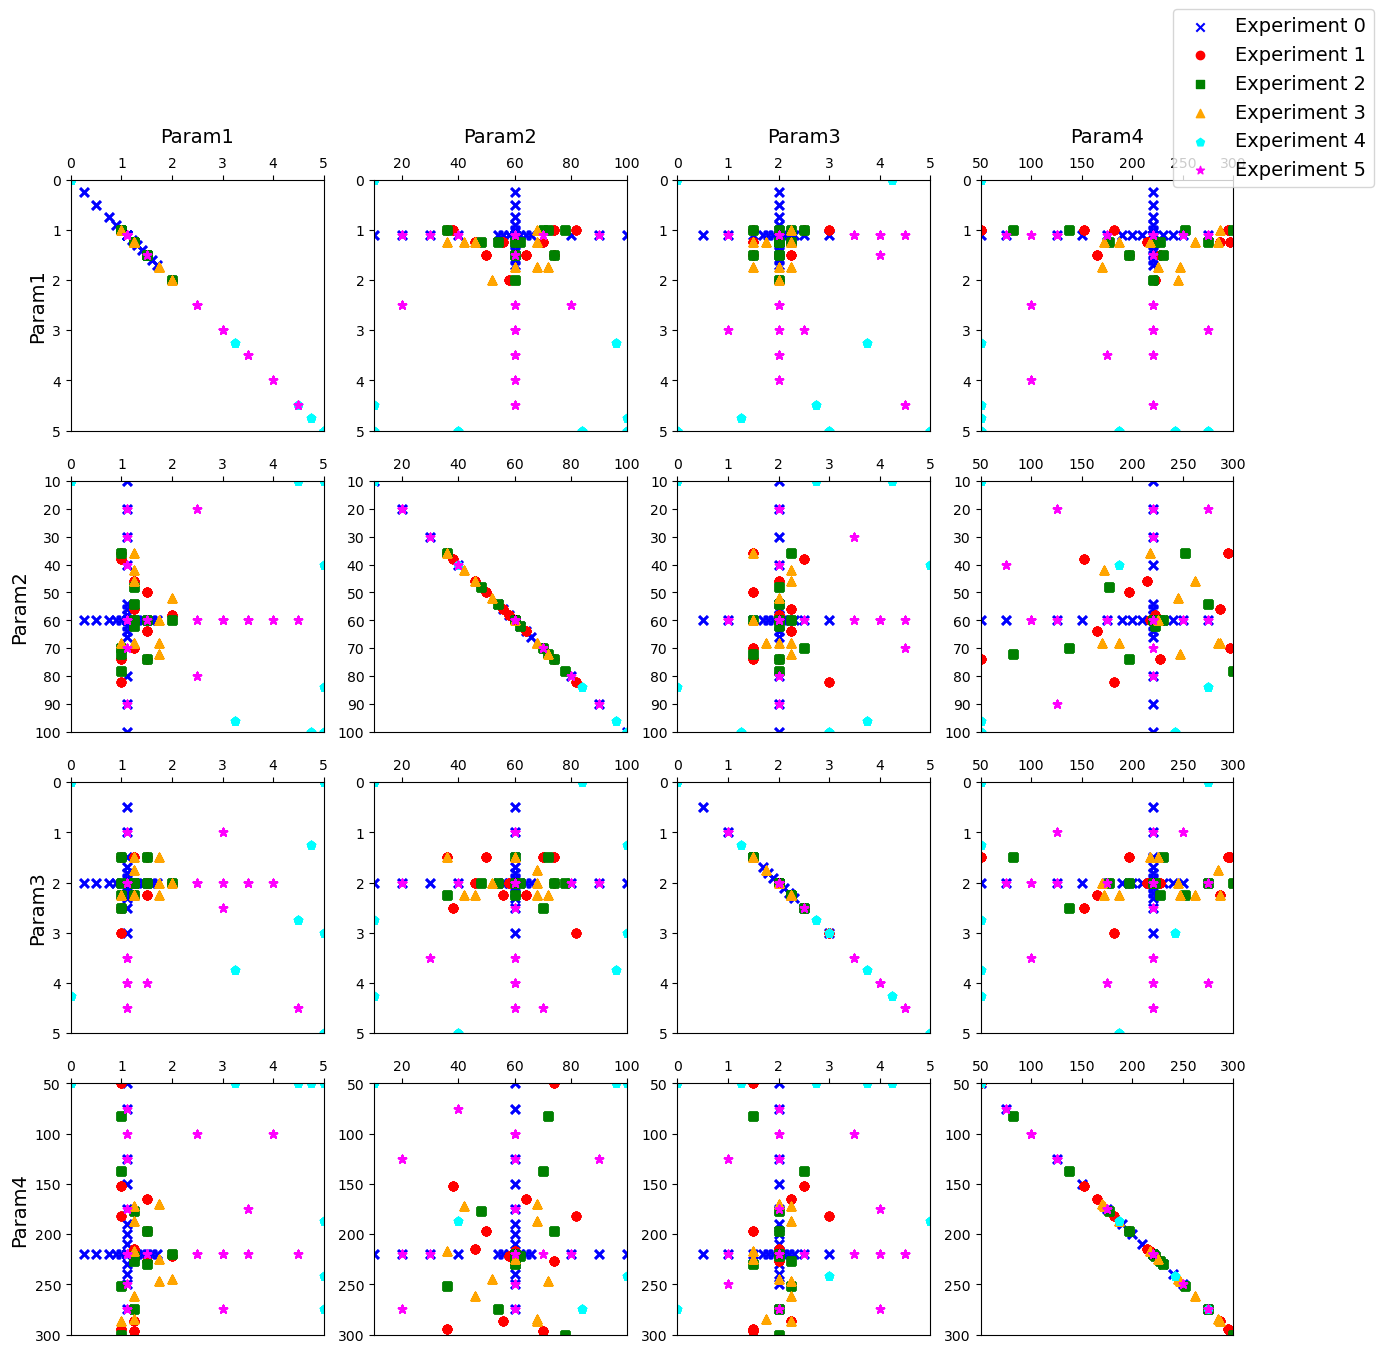

In [20]:
fig, axs = plt.subplots(4, 4, figsize=(15,15))

bounds = [(0,5),(10,100),(0,5),(50,300)]

for x in range(4):
    for y in range(4):
        axs[x,y].scatter(df0['Param'+str(y+1)], df0['Param'+str(x+1)], c='blue', alpha=1, marker='x', label='Experiment 0')
        axs[x,y].scatter(df1['Param'+str(y+1)], df1['Param'+str(x+1)], c='red', alpha=1, marker='o', label='Experiment 1')
        axs[x,y].scatter(df2['Param'+str(y+1)], df2['Param'+str(x+1)], c='green', alpha=1, marker='s', label='Experiment 2')
        axs[x,y].scatter(df3['Param'+str(y+1)], df3['Param'+str(x+1)], c='orange', alpha=1, marker='^', label='Experiment 3')
        axs[x,y].scatter(df4['Param'+str(y+1)], df4['Param'+str(x+1)], c='cyan', alpha=1, marker='p', label='Experiment 4')
        axs[x,y].scatter(df5['Param'+str(y+1)], df5['Param'+str(x+1)], c='magenta', alpha=1, marker='*', label='Experiment 5')

        axs[x,y].set_ylim(bounds[x])
        axs[x,y].set_xlim(bounds[y])

        axs[x,y].invert_yaxis()
        axs[x,y].xaxis.tick_top()



for i in range(4):
    axs[i,0].set_ylabel('Param'+str(i+1), fontsize=14)
    #axs[0,i].set_xlabel('Param'+str(i+1), fontsize=14)
    axs[0,i].text(0.5, 1.15, 'Param'+str(i+1), transform=axs[0,i].transAxes, ha='center', fontsize=14)


# fig.suptitle('Quality Scores', fontsize=24)
fig.legend(['Experiment 0', 'Experiment 1', 'Experiment 2', 'Experiment 3','Experiment 4', 'Experiment 5'], loc='upper right', fontsize=14)

plt.show()




# Compare experiment with GP predictions

In [15]:
current_df = df2
X_means = current_df.groupby(['Experiment'])['Area sum'].mean()
X_stds = current_df.groupby(['Experiment'])['Area sum'].std()

In [14]:
# Exp1
# means = np.array([1668,1827,1387,1335,1701,2017,1915,1661,1828,1991,2329,2282])
# stds  = np.array([1083,1029,1177,1328,1214,1393,928 ,748 ,1419,699 ,1412,1364])
# Exp2
means = np.array([1667,1790,1544,1517,1936,1375,1883,1942,1999,2046,2085])
stds = np.array([1076,844,855,960,726,1019,1228,1073,934,1301,660])
# Exp3
# means = np.array([2015, 2055,2352,2206,2233,2470,2599,2382,2396,2128])
# stds = np.array([1260,1345,1381,1181,1292,1417,1378,1146,1123,926])

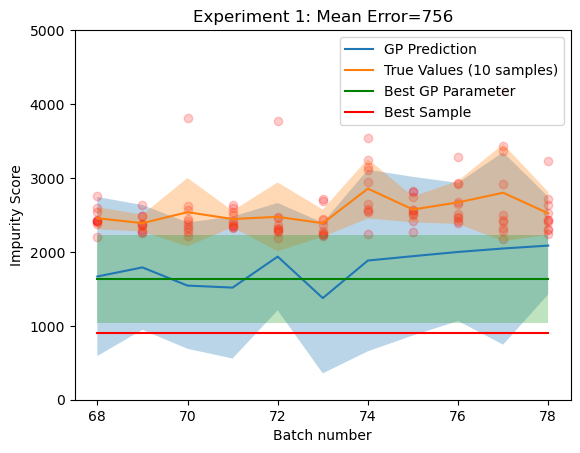

In [16]:
# Define points
current_df['Experiment'] = current_df['Experiment'].astype(int)
x = np.arange(current_df['Experiment'].min(),current_df['Experiment'].min()+current_df['Experiment'].nunique())

# Plot predictions
plt.plot(x,means, label='GP Prediction')
plt.fill_between(x, means-stds, means+stds,alpha=0.3)

# Plot sampled points
X = current_df['Experiment']
plt.scatter(X,current_df['Area sum'],color='r',alpha=0.2)

# Plot sampled points as a distribution
plt.plot(x,X_means, label='True Values (10 samples)')
plt.fill_between(x, X_means-X_stds, X_means+X_stds,alpha=0.3)

# Plot best point
index = df['Area sum'].argmin()
get_exp = df.iloc[index].Experiment
best_parameters = df[df['Experiment']==get_exp]
best_value = best_parameters['Area sum'].min()
best_mean = best_parameters['Area sum'].mean()
best_std = best_parameters['Area sum'].std()


plt.plot(x, [best_mean]*len(x), color='green',label='Best GP Parameter')
plt.fill_between(x, best_mean-best_std, best_mean+best_std,alpha=0.3)
plt.plot(x, [best_value]*len(x), color='red', label='Best Sample')

# Define plot
plt.title('Experiment 1: Mean Error='+str(int(np.mean(abs(X_means-means)))))
plt.xlabel('Batch number')
plt.ylabel('Impurity Score')
plt.ylim(0,5000)
plt.legend(loc='upper right')

plt.show()

# Compare "*Control data*" vs. "*Other training data*" vs. "*Sampled data*"

In [5]:
control_mean = dfc['Area sum'].mean()
control_std = dfc['Area sum'].std()
control_max = dfc['Area sum'].max()
control_min = dfc['Area sum'].min()

training_df = pd.concat([df0]) # , df4, df5
training_df = training_df[training_df['Area sum']<6000]
training_mean = df0['Area sum'].mean()
training_std = df0['Area sum'].std()
training_max = df0['Area sum'].max()
training_min = df0['Area sum'].min()

sampled_df = pd.concat([df1,df2,df3])
sampled_mean = sampled_df['Area sum'].mean()
sampled_std = sampled_df['Area sum'].std()
sampled_max = sampled_df['Area sum'].max()
sampled_min = sampled_df['Area sum'].min()

all_df = pd.concat([df0,df1,df2,df3,df4,df5])


In [14]:
t1 = training_df[training_df['Area sum'] < sampled_min].sort_values(by=['Area sum'], ascending=False)#.iloc[20:].head(20)
t1[t1['Param1']==1.25]

,Experiment,Index,Param1,Param2,Param3,Param4,Area sum,BLOBs,Area mean,Area std,Roundness mean,Roundness std,Perimeter mean,Perimeter std
67,007,8,1.25,60,2.0,220,1878,49,185.959184,242.174162,0.710452,0.239355,54.377382,46.739661
62,007,3,1.25,60,2.0,220,1778,27,271.555556,321.645921,0.752241,0.275709,74.859645,62.088156
68,007,9,1.25,60,2.0,220,1710,41,225.292683,409.786276,0.596814,0.310026,59.254706,74.965973
64,007,5,1.25,60,2.0,220,1629,29,211.689655,246.000715,0.694007,0.315927,62.958874,49.047249
61,007,2,1.25,60,2.0,220,1421,27,211.111111,256.068037,0.694465,0.240485,58.483933,45.983802
60,007,1,1.25,60,2.0,220,1409,32,197.625000,283.241256,0.726094,0.249353,60.978276,66.882306


In [48]:
t1 = training_df[training_df['Area sum'] < sampled_min].sort_values(by=['Area sum'], ascending=False)#.iloc[20:].head(20)
t1[t1['Param1']==1.0]

,Experiment,Index,Param1,Param2,Param3,Param4,Area sum,BLOBs,Area mean,Area std,Roundness mean,Roundness std,Perimeter mean,Perimeter std
40,005,1,1.0,60,2.0,220,1885,37,395.810811,639.125071,0.632008,0.370676,91.361516,114.274596
41,005,2,1.0,60,2.0,220,1669,22,319.000000,305.095067,0.858422,0.179173,85.217962,53.195393


/tmp/ipykernel_6331/2317599270.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i//2,i%2].set_xticklabels(index, rotation=90)
/tmp/ipykernel_6331/2317599270.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i//2,i%2].set_xticklabels(index, rotation=90)
/tmp/ipykernel_6331/2317599270.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i//2,i%2].set_xticklabels(index, rotation=90)
/tmp/ipykernel_6331/2317599270.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i//2,i%2].set_xticklabels(index, rotation=90)


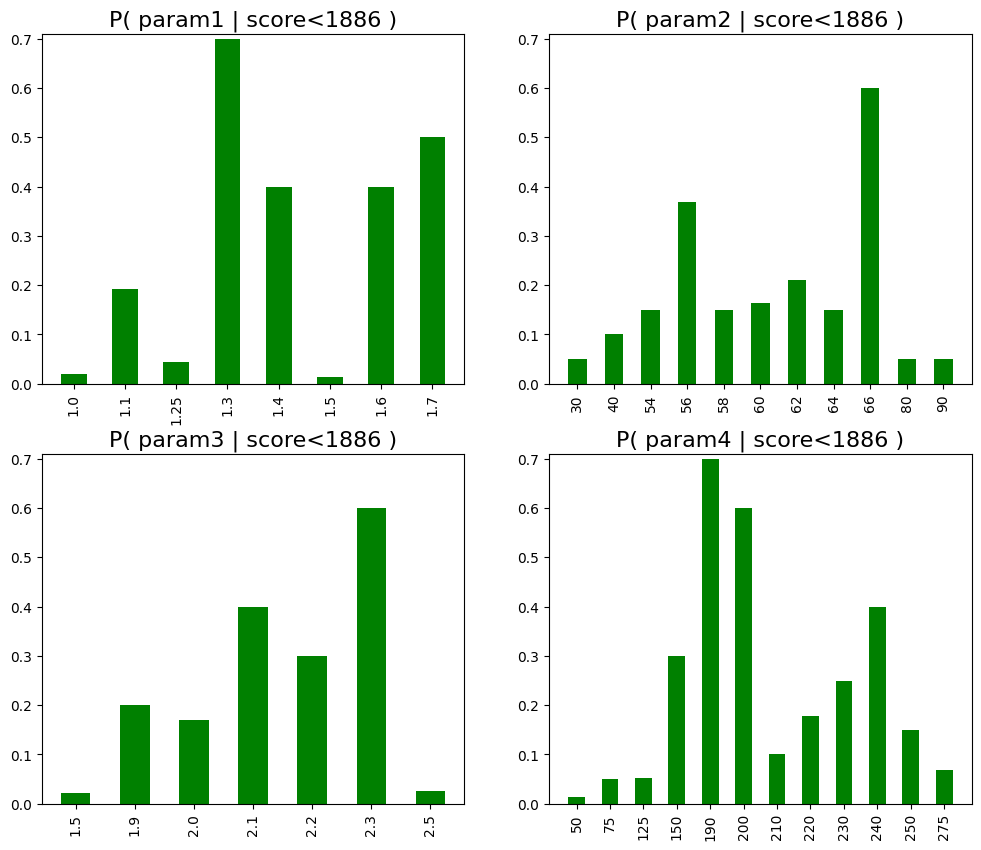

In [185]:
#param_str = 'Param1'

param_strs = ['Param1','Param2','Param3','Param4']
fig, axs = plt.subplots(2,2, figsize=(12, 10))
for i, param_str in enumerate(param_strs):
    x = all_df[param_str].value_counts().sort_index()
    index = list(x.index)
    index = [str(x) for x in index]
    vals  = list(x)
    freq_dict = dict(zip(index,vals))

    count_df = all_df[all_df['Area sum']<1886][param_str].value_counts().sort_index()
    index = list(count_df.index)
    index = [str(x) for x in index]
    vals  = list(count_df)
    vals2 = []
    for j, val in enumerate(vals):
        vals2.append(val/freq_dict[str(index[j])])

    axs[i//2,i%2].bar(index, np.array(vals2), width=0.5, color='g')
    axs[i//2,i%2].set_xticklabels(index, rotation=90)
    axs[i//2,i%2].set_title(f'P( {param_str.lower()} | score<1886 )', fontsize=16)
    axs[i//2,i%2].set_ylim(0,0.71)

plt.show()


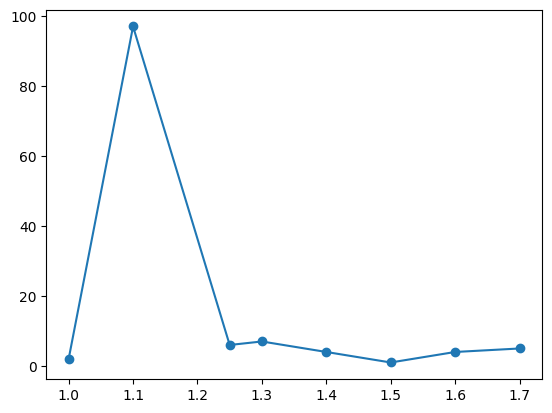

In [154]:
param_str = 'Param1'

count_df = all_df[all_df['Area sum']<1886][param_str].value_counts().sort_index()
plt.plot(count_df, marker='o')
plt.show()

### compare distributions

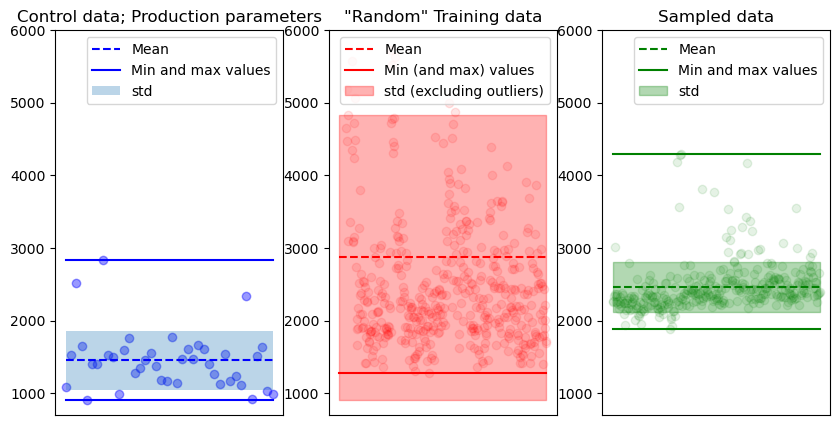

In [79]:
bounds = [700,6000]
fig, axs = plt.subplots(1,3, figsize=(10,5))

N = dfc['Area sum'].shape[0]
axs[0].scatter(np.arange(0,N), dfc['Area sum'], color='blue', alpha=0.4)
axs[0].plot(np.arange(0,N), [control_mean]*N,label='Mean', color='blue', linestyle='--')
axs[0].plot(np.arange(0,N), [control_max]*N, color='blue', label="Min and max values")
axs[0].plot(np.arange(0,N), [control_min]*N, color='blue')
axs[0].fill_between(np.arange(0,N), control_mean-control_std, control_mean+control_std,alpha=0.3, label='std')
axs[0].set_ylim(bounds)
axs[0].set_title('Control data; Production parameters')
axs[0].legend()

N = df0['Area sum'].shape[0]
axs[1].scatter(np.arange(0,N), df0['Area sum'], color='red', alpha=0.1)
axs[1].plot(np.arange(0,N), [training_mean]*N,label='Mean', color='red', linestyle='--')
#axs[1].plot(np.arange(0,N), [training_max]*N, color='red')
axs[1].plot(np.arange(0,N), [training_min]*N, color='red', label="Min (and max) values")
axs[1].fill_between(np.arange(0,N), training_mean-training_std, training_mean+training_std,alpha=0.3, color='red', label='std (excluding outliers)')
axs[1].set_ylim(bounds)
axs[1].set_title('"Random" Training data')
axs[1].legend()

N = sampled_df['Area sum'].shape[0]
axs[2].scatter(np.arange(0,N), sampled_df['Area sum'], color='green', alpha=0.1)
axs[2].plot(np.arange(0,N), [sampled_mean]*N,label='Mean', color='green', linestyle='--')
axs[2].plot(np.arange(0,N), [sampled_max]*N, color='green', label="Min and max values")
axs[2].plot(np.arange(0,N), [sampled_min]*N, color='green')
axs[2].fill_between(np.arange(0,N), sampled_mean-sampled_std, sampled_mean+sampled_std,alpha=0.3, color='green', label='std')
axs[2].set_ylim(bounds)
axs[2].set_title('Sampled data')
axs[2].legend()

for ax in axs:
    ax.set_xticks([])

plt.show()

# Show possible differences in materials 
## (impurity might be more dependant on material, than welding?)

In [58]:
imgs, file_names = load_processed_images()
baseline = io.imread('baseline_mean.png')


In [59]:
dfs = [pd.concat([df0,dfc]),df1,df2,df3,df4,df5]
std_imgs = []
mean_imgs = []
for dframe in dfs:
    exp_images = []
    for num in dframe['Experiment'].unique():
        files = [f for f in file_names if str(num) in f.split(',')[0]]
        images = [imgs[i] for i in range(len(imgs)) if str(num) in file_names[i]]
        exp_images.extend(images)
    std_imgs.append(np.std(exp_images, axis=0).astype('int16'))
    mean_imgs.append(np.mean(exp_images, axis=0).astype('int16'))


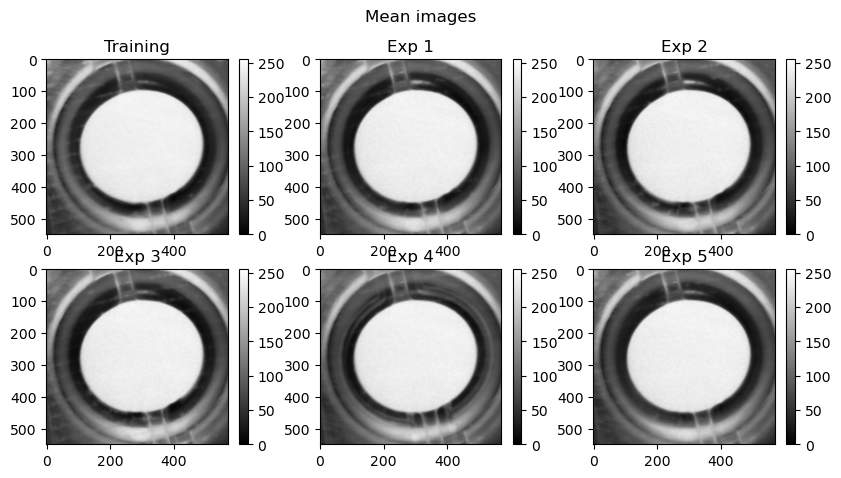

In [60]:
fig, axs = plt.subplots(2,3, figsize=(10,5))
for i in range(len(dfs)):
    im = axs[i//3][i%3].imshow(mean_imgs[i], cmap='gray')
    axs[i//3][i%3].set_title("Exp "+str(i))
    fig.colorbar(im, ax=axs[i//3][i%3])
    im.set_clim(vmin=0, vmax=255)

axs[0,0].set_title("Training")
fig.suptitle('Mean images')
plt.show()

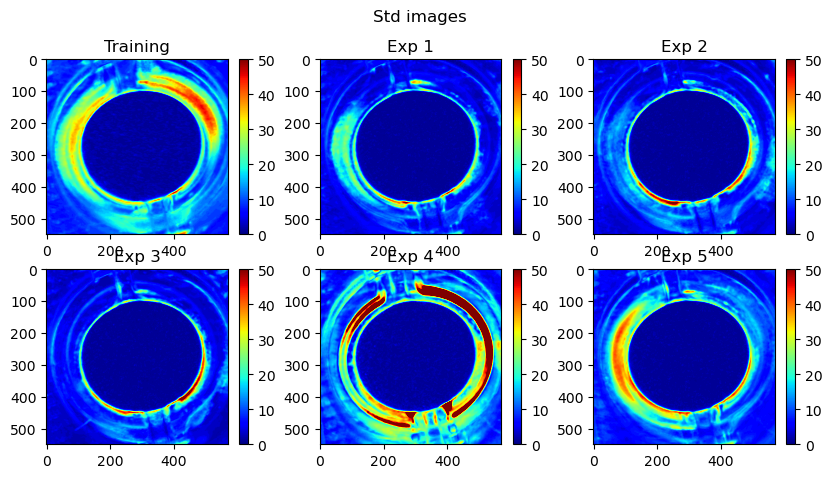

In [61]:
fig, axs = plt.subplots(2,3, figsize=(10,5))
for i in range(len(dfs)):
    im = axs[i//3][i%3].imshow(std_imgs[i], cmap='jet')
    axs[i//3][i%3].set_title("Exp "+str(i))
    fig.colorbar(im, ax=axs[i//3][i%3])
    im.set_clim(vmin=0, vmax=50)

axs[0,0].set_title("Training")
fig.suptitle('Std images')
plt.show()

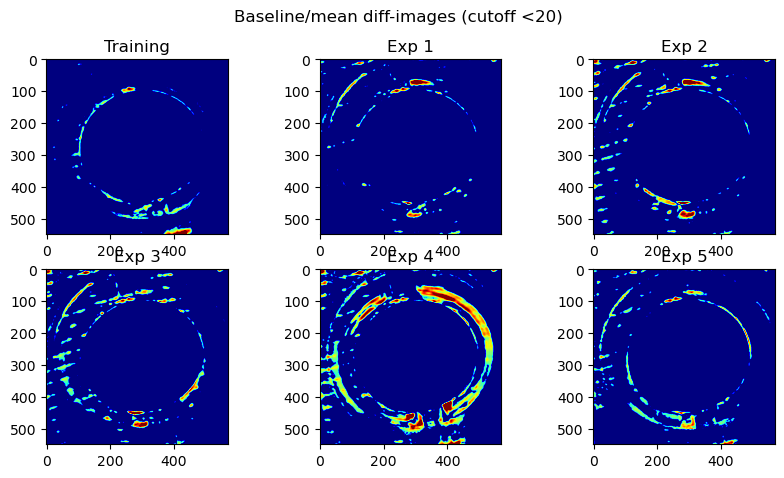

In [62]:
fig, axs = plt.subplots(2,3, figsize=(10,5))
for i in range(len(dfs)):
    diff = abs(mean_imgs[i]-baseline)
    diff[diff < 20] = 0
    im = axs[i//3][i%3].imshow(diff, cmap='jet')
    axs[i//3][i%3].set_title("Exp "+str(i))
    #fig.colorbar(im, ax=axs[i//3][i%3])
    im.set_clim(vmin=0, vmax=50)

axs[0,0].set_title("Training")
fig.suptitle('Baseline/mean diff-images (cutoff <20)')
plt.show()

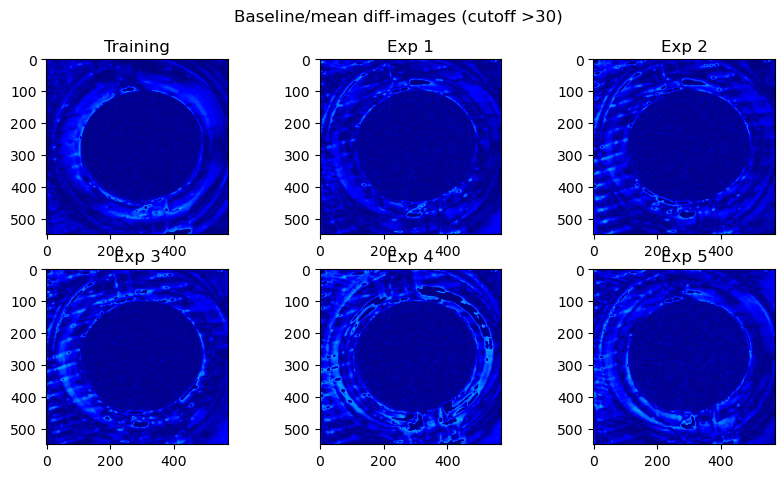

In [63]:
fig, axs = plt.subplots(2,3, figsize=(10,5))
for i in range(len(dfs)):
    diff = abs(mean_imgs[i]-baseline)
    diff[diff > 30] = 0
    im = axs[i//3][i%3].imshow(diff, cmap='jet')
    axs[i//3][i%3].set_title("Exp "+str(i))
    #fig.colorbar(im, ax=axs[i//3][i%3])
    im.set_clim(vmin=0, vmax=100)

axs[0,0].set_title("Training")
fig.suptitle('Baseline/mean diff-images (cutoff >30)')
plt.show()

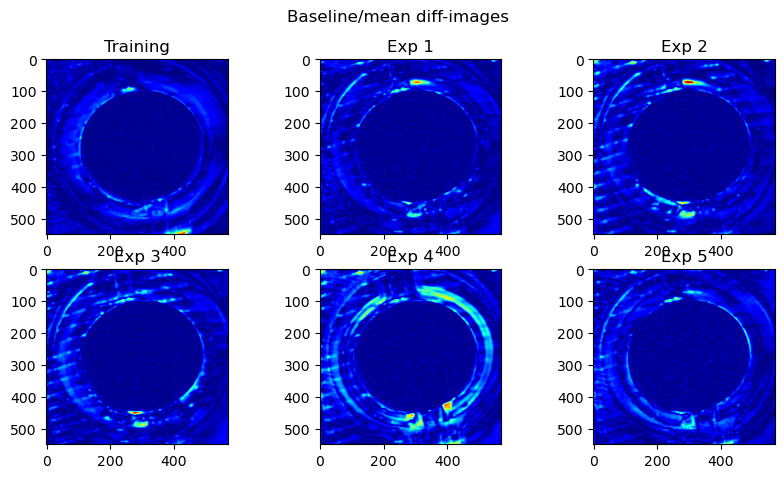

In [64]:
fig, axs = plt.subplots(2,3, figsize=(10,5))
for i in range(len(dfs)):
    diff = abs(mean_imgs[i]-baseline)
    #diff[diff > 10] = 10
    im = axs[i//3][i%3].imshow(diff, cmap='jet')
    axs[i//3][i%3].set_title("Exp "+str(i))
    #fig.colorbar(im, ax=axs[i//3][i%3])
    im.set_clim(vmin=0, vmax=100)

axs[0,0].set_title("Training")
fig.suptitle('Baseline/mean diff-images')
plt.show()

In [65]:
dfs = [pd.concat([df0,dfc]),pd.concat([df1,df2,df3,df4,df5])]
std_imgs = []
mean_imgs = []
for dframe in dfs:
    exp_images = []
    for num in dframe['Experiment'].unique():
        files = [f for f in file_names if str(num) in f.split(',')[0]]
        images = [imgs[i] for i in range(len(imgs)) if str(num) in file_names[i]]
        exp_images.extend(images)
    std_imgs.append(np.std(exp_images, axis=0).astype('int16'))
    mean_imgs.append(np.mean(exp_images, axis=0).astype('int16'))

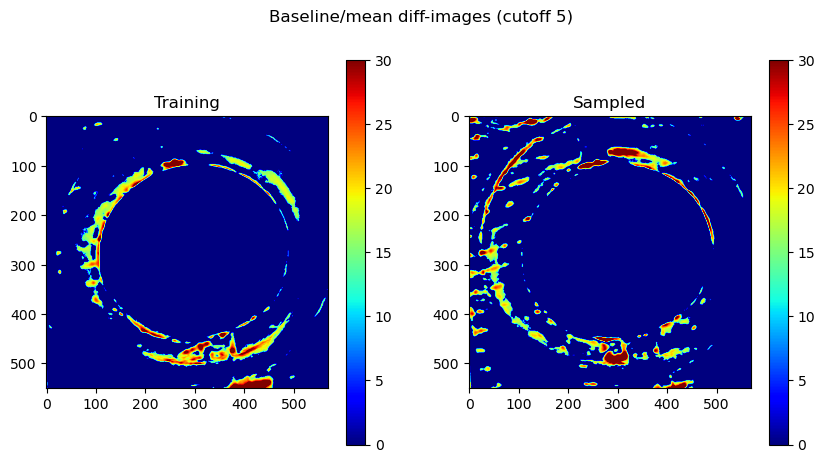

In [66]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
for i in range(len(dfs)):
    diff = abs(mean_imgs[i]-baseline)
    diff[diff < 15] = 0
    im = axs[i].imshow(diff, cmap='jet')
    fig.colorbar(im, ax=axs[i])
    im.set_clim(vmin=0, vmax=30)

axs[0].set_title("Training")
axs[1].set_title("Sampled")

fig.suptitle('Baseline/mean diff-images (cutoff 5)')
plt.show()

In [19]:
dfs = [pd.concat([dfc,df0])]
imgs, file_names = load_processed_images()

std_imgs = []
mean_imgs = []
for dframe in dfs:
    exp_images = []
    for num in dframe['Experiment'].unique():
        files = [f for f in file_names if str(num) in f.split(',')[0]]
        images = [imgs[i] for i in range(len(imgs)) if str(num) in file_names[i]]
        exp_images.extend(images)
    std_imgs.append(np.std(exp_images, axis=0).astype('int16'))
    mean_imgs.append(np.mean(exp_images, axis=0).astype('int16'))

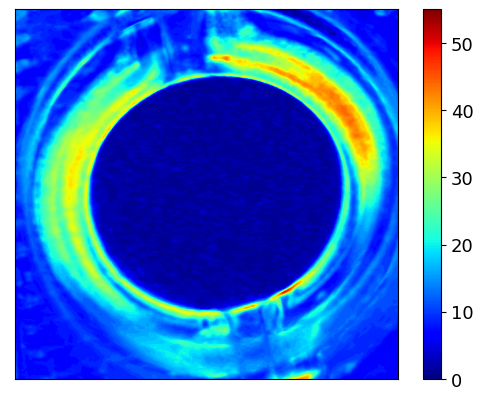

In [20]:
plt.imshow(abs(std_imgs[0]), cmap='jet')
# increase font size of colorbar
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=13)  

#plt.colorbar()
plt.clim(vmin=0, vmax=55)
plt.xticks([])
plt.yticks([])
plt.show()